<a href="https://colab.research.google.com/github/daria-sazon/global_sales_analysis/blob/main/global_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Mate_homework/dataset

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework/dataset


# 1. Data overview

In [ ]:
# Підключаємо датасет
events_df = pd.read_csv("events.csv")
products_df = pd.read_csv("products.csv")
countries_df = pd.read_csv("countries.csv")

## Events data

In [ ]:
events_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


## Products data

In [ ]:
products_df.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


## Countries data

In [ ]:
countries_df.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(f"Кількість рядків і колонок в таблиці events: {events_df.shape}")
print(f"Кількість рядків і колонок в таблиці products: {products_df.shape}")
print(f"Кількість рядків і колонок в таблиці countries: {countries_df.shape}")

Кількість рядків і колонок в таблиці events: (1330, 10)
Кількість рядків і колонок в таблиці products: (12, 2)
Кількість рядків і колонок в таблиці countries: (249, 5)


**Ключові поля для поєднання таблиць:**
- events_df.product_id -> products_df.id
- events_df.country_code -> countries_df.alpha-3

# 2. Data cleaning

## Events data

In [ ]:
# Перевіряємо кількість пропусків в даних
print(events_df.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Доля пропусків даних, %
print(events_df.isna().sum() / events_df.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Перевірка пропущених даних перед заміної
missing_rows = events_df[events_df.isna().any(axis=1)]
print(missing_rows)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
2     101025998  7/18/2014  8/11/2014              M          NaN        7940   
13    104548490   1/1/2014   1/5/2014              M          NaN        7331   
26    117929494  1/24/2015   3/2/2015              H          NaN        4594   
29    118859469   6/2/2011   7/1/2011              L          NaN        8969   
43    126948583  5/24/2017   7/9/2017              C          NaN        7331   
...         ...        ...        ...            ...          ...         ...   
1213  919922006  8/27/2011  9/18/2011              L          NaN        4594   
1220  922564303  3/17/2017   4/2/2017              L          NaN        7940   
1250  941061675   3/8/2017  3/20/2017              M          NaN        5988   
1296  975080668  7/23/2017  8/20/2017              C          NaN        5988   
1317  989102828  6/11/2012   7/8/2012              L          NaN        4594   

     Sales Channel  Units S

In [ ]:
# Корегуємо формат назв колонок
events_df.columns = events_df.columns.str.replace(" ", "_").str.lower()

In [ ]:
# Доля пропусків даних country_code > 6%, тому робимо заміну з Nan на "Unknown"
events_df["country_code"] = events_df["country_code"].fillna("Unknown")

In [ ]:
# Доля пропусків units_sold < 0%, тому видаляємо ці строки
events_df = events_df.dropna()

In [ ]:
# Робимо перетворення типу даних для колонок order_date та ship_date
events_df["order_date"] = pd.to_datetime(events_df["order_date"])
events_df["ship_date"] = pd.to_datetime(events_df["ship_date"])

/tmp/ipython-input-18-1004280205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df["order_date"] = pd.to_datetime(events_df["order_date"])
/tmp/ipython-input-18-1004280205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df["ship_date"] = pd.to_datetime(events_df["ship_date"])


In [ ]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1328 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


In [ ]:
# Перевірка дублікатів
duplicate_rows_events = events_df.duplicated()
print(duplicate_rows_events)
print(duplicate_rows_events.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


In [ ]:
# Перевірка даних на наявність аномалій
events_df.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


## Products data

In [ ]:
# Кількість пропусків в даних
print(products_df.isna().sum())

id           0
item_type    0
dtype: int64


In [ ]:
# Доля пропусків даних, %
print(products_df.isna().sum() / products_df.shape[0] * 100)

id           0.0
item_type    0.0
dtype: float64


In [ ]:
# Перевірка дублікатів
duplicate_rows_products = products_df.duplicated()
print(duplicate_rows_products)
print(duplicate_rows_products.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
# Перевірка даних на наявність аномалій
products_df.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


## Countries data

In [ ]:
# Кількість пропусків в даних
print(countries_df.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
# Доля пропусків даних, %
print(countries_df.isna().sum() / countries_df.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
# Корегуємо формат назв колонок
countries_df.columns = countries_df.columns.str.replace("-", "_")

In [ ]:
# Доля пропусків < 0%, тому видаляємо ці строки
countries_df = countries_df.dropna()

In [ ]:
# Перевірка дублікатів
duplicate_rows_countries = countries_df.duplicated()
print(duplicate_rows_countries)
print(duplicate_rows_countries.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 247, dtype: bool
0


In [ ]:
# Перевірка даних на наявність аномалій
countries_df.describe()

,name,alpha_2,alpha_3,region,sub_region
count,247,247,247,247,247
unique,247,247,247,5,17
top,Afghanistan,AF,AFG,Africa,Latin America and the Caribbean
freq,1,1,1,59,52


# 3. Data analysis and visualization

### 3.1. Проводимо з’єднання трьох таблиць в один датафрейм. Видалемо непотрібні для аналізу колонки. За потреби, зробимо перейменування колонок.

In [ ]:
# Змінюємо назву колонки "id" в products_df для подальшого обʼєднання
products_df.rename(columns={"id": "product_id"}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  12 non-null     int64 
 1   item_type   12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
# Обʼєднуємо таблиці events_df та products_df
first_union = pd.merge(events_df, products_df, on="product_id", how="left")
print(first_union)

       order_id order_date  ship_date order_priority country_code  product_id  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1324  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1325  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1326  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1327  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     sales_channel  units_s

In [ ]:
# Змінюємо назву колонки "alpha_3" та "name" в countries_df для подальшого обʼєднання
countries_df.rename(columns={"alpha_3": "country_code"}, inplace=True)
countries_df.rename(columns={"name": "country"}, inplace=True)
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       247 non-null    object
 1   alpha_2       247 non-null    object
 2   country_code  247 non-null    object
 3   region        247 non-null    object
 4   sub_region    247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


In [ ]:
# Обʼєднуємо датафрейми events_df та countries_df
data = pd.merge(first_union, countries_df, on="country_code", how="left")

In [ ]:
# Видалємо колону "alpha_2", тому що вона непотрібна для аналізу
data = data.drop("alpha_2", axis=1)

In [ ]:
print(data)

       order_id order_date  ship_date order_priority country_code  product_id  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1324  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1325  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1326  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1327  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     sales_channel  units_s

In [ ]:
# Після обʼєднання таблиць, робимо в колонках заміну строк з Nan на "Unknown"
columns_to_fill = ["country", "region", "sub_region"]
data[columns_to_fill] = data[columns_to_fill].fillna("Unknown")

In [ ]:
print(data)

       order_id order_date  ship_date order_priority country_code  product_id  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1324  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1325  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1326  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1327  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     sales_channel  units_s

### 3.2. Ключові метрики діяльності компанії

In [ ]:
total_orders = data["order_id"].value_counts().sum()
data["revenue"] = data["units_sold"] * data["unit_price"]
data["costs"] = data["units_sold"] * data["unit_cost"]
data["profit"] = data["revenue"] - data["costs"]

total_revenue = data["revenue"].sum()
total_costs = data["costs"].sum()
total_profit = data["profit"].sum()
total_countries = data["country"].nunique()

print(f"Загальна кількість замовлень: {total_orders}")
print(f"Загальні продажі компанії: {total_revenue}$")
print(f"Загальні витрати компанії: {total_costs}$")
print(f"Чистий прибуток компанії: {total_profit}$")
print(f"Загальна кількість охоплених країн: {total_countries}")

Загальна кількість замовлень: 1328
Загальні продажі компанії: 1702129408.21$
Загальні витрати компанії: 1200694949.21$
Чистий прибуток компанії: 501434459.0$
Загальна кількість охоплених країн: 46


### 3.3. Проаналізуємо продажі (доходи, витрати, прибутки, популярність товарів) та зробимо відповідні візуалізації в розрізі:

- категорій товарів;
- географії (країн, регіонів);
- каналів продажу (онлайн або офлайн).

In [ ]:
# Рахуємо доходи по категоріях товарів
revenue_by_category = data.groupby("item_type")["revenue"].sum().sort_values(ascending=False)

print(f"Доходи по категоріях товарів: {revenue_by_category}")

Доходи по категоріях товарів: item_type
Office Supplies    4.022140e+08
Household          2.942052e+08
Cosmetics          2.331548e+08
Meat               2.237620e+08
Baby Food          1.436476e+08
Cereal             9.579140e+07
Vegetables         8.974673e+07
Snacks             7.478861e+07
Clothes            6.462655e+07
Personal Care      4.557902e+07
Beverages          2.909316e+07
Fruits             5.520300e+06
Name: revenue, dtype: float64


In [ ]:
# Рахуємо витрати по категоріях товарів
costs_by_category = data.groupby("item_type")["costs"].sum().sort_values(ascending=False)

print(f"Витрати по категоріях товарів: {costs_by_category}")

Витрати по категоріях товарів: item_type
Office Supplies    3.242368e+08
Household          2.212427e+08
Meat               1.934243e+08
Cosmetics          1.404315e+08
Baby Food          8.970659e+07
Cereal             5.453637e+07
Vegetables         5.297073e+07
Snacks             4.776119e+07
Personal Care      3.160361e+07
Clothes            2.119524e+07
Beverages          1.949150e+07
Fruits             4.094370e+06
Name: costs, dtype: float64


In [ ]:
# Рахуємо прибуток по категоріях товарів
profit_by_category = data.groupby("item_type")["profit"].sum().sort_values(ascending=False)

print(f"Прибуток по категоріях товарів: {profit_by_category}")

Прибуток по категоріях товарів: item_type
Cosmetics          92723306.17
Office Supplies    77977176.25
Household          72962466.77
Baby Food          53940997.16
Clothes            43431314.40
Cereal             41255034.15
Vegetables         36776002.72
Meat               30337736.00
Snacks             27027422.40
Personal Care      13975410.68
Beverages           9601662.78
Fruits              1425929.52
Name: profit, dtype: float64


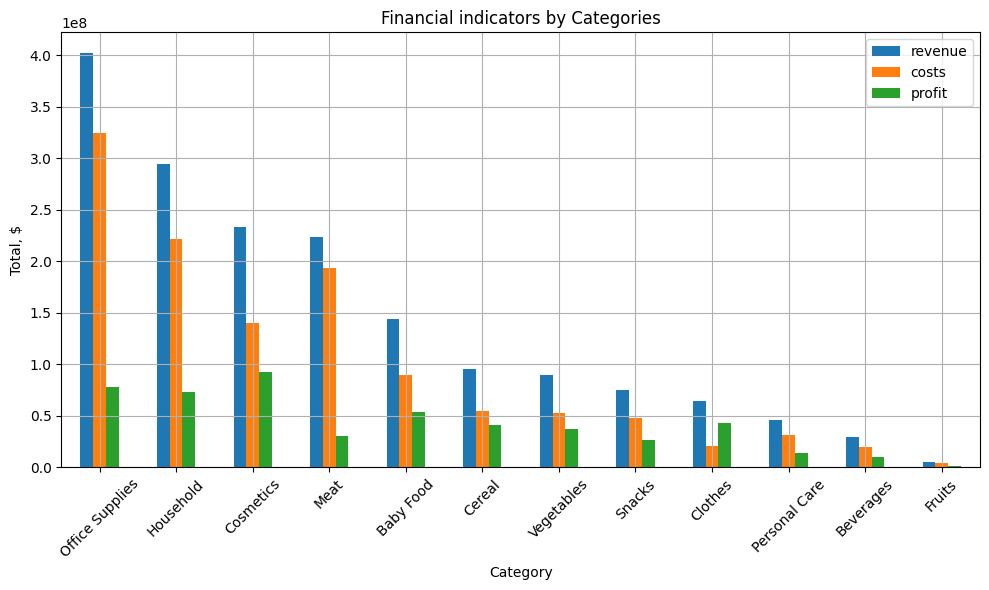

In [ ]:
# Створюємо візуалізацію фінансових показників по категоріях товарів
category_summary = data.groupby("item_type")[["revenue", "costs", "profit"]].sum().sort_values(by="revenue", ascending=False)

category_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Financial indicators by Categories")
plt.ylabel("Total, $")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Рахуємо доходи по країнах
revenue_by_country = data.groupby("country")["revenue"].sum().sort_values(ascending=False)

print(f"Доходи по країнах: {revenue_by_country.head(10)}")

Доходи по країнах: country
Unknown                   1.031456e+08
Czech Republic            5.354393e+07
Ukraine                   5.325232e+07
Bosnia and Herzegovina    5.011751e+07
Macedonia                 4.922209e+07
San Marino                4.788371e+07
Andorra                   4.775669e+07
Portugal                  4.717219e+07
Malta                     4.714532e+07
Russia                    4.605166e+07
Name: revenue, dtype: float64


In [ ]:
# Рахуємо витрати по країнах
costs_by_country = data.groupby("country")["costs"].sum().sort_values(ascending=False)

print(f"Витрати по країнах: {costs_by_country.head(10)}")

Витрати по країнах: country
Unknown                   75420223.01
Czech Republic            39908338.36
Ukraine                   38447391.80
Bosnia and Herzegovina    36859905.72
Portugal                  35826782.25
Macedonia                 35537985.30
San Marino                34090715.67
Russia                    32783977.17
Malta                     32535192.93
Andorra                   32346656.54
Name: costs, dtype: float64


In [ ]:
# Рахуємо прибуток по країнах
profit_by_country = data.groupby("country")["profit"].sum().sort_values(ascending=False)

print(f"Прибуток по країнах: {profit_by_country.head(10)}")

Прибуток по країнах: country
Unknown                   27725423.94
Andorra                   15410036.63
Ukraine                   14804925.74
Malta                     14610127.88
San Marino                13792992.81
Hungary                   13786231.03
Macedonia                 13684099.95
Czech Republic            13635593.78
Russia                    13267682.64
Bosnia and Herzegovina    13257602.77
Name: profit, dtype: float64


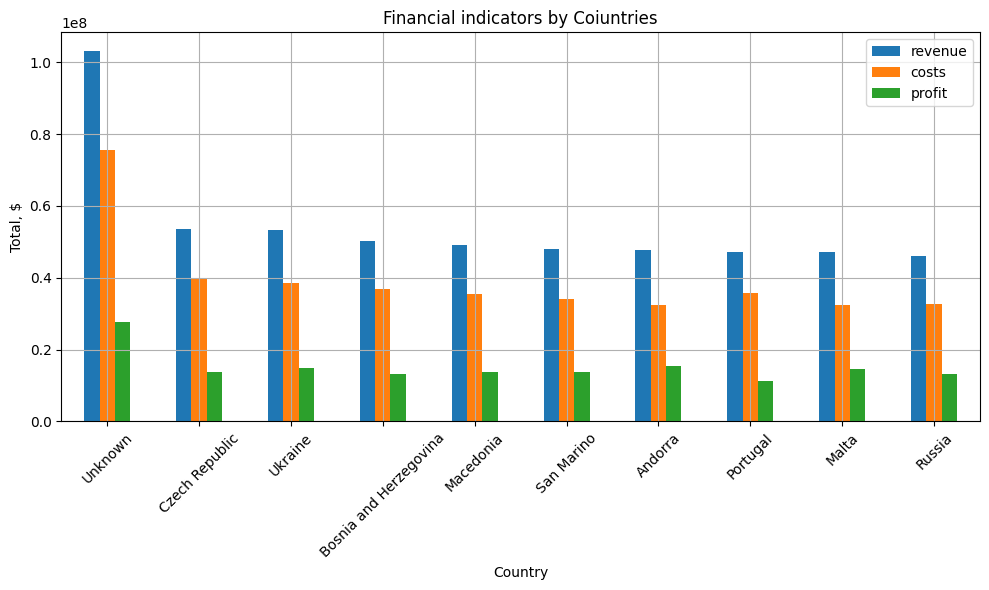

In [ ]:
# Створюємо візуалізацію фінансових показників по країнаx
category_summary = data.groupby("country")[["revenue", "costs", "profit"]].sum().sort_values(by="revenue", ascending=False)

category_summary.head(10).plot(kind="bar", figsize=(10, 6))
plt.title("Financial indicators by Coiuntries")
plt.ylabel("Total, $")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Рахуємо доходи по регіонах
revenue_by_region = data.groupby("region")["revenue"].sum().sort_values(ascending=False)

print(f"Доходи по регіонах: {revenue_by_region}")

Доходи по регіонах: region
Europe     1.505653e+09
Unknown    1.031456e+08
Asia       9.333089e+07
Name: revenue, dtype: float64


In [ ]:
# Рахуємо витрати по регіонах
costs_by_region = data.groupby("region")["costs"].sum().sort_values(ascending=False)

print(f"Витрати по регіонах: {costs_by_region}")

Витрати по регіонах: region
Europe     1.057096e+09
Unknown    7.542022e+07
Asia       6.817863e+07
Name: costs, dtype: float64


In [ ]:
# Рахуємо прибуток по регіонах
profit_by_region = data.groupby("region")["profit"].sum().sort_values(ascending=False)

print(f"Прибуток по регіонах: {profit_by_region}")

Прибуток по регіонах: region
Europe     4.485568e+08
Unknown    2.772542e+07
Asia       2.515225e+07
Name: profit, dtype: float64


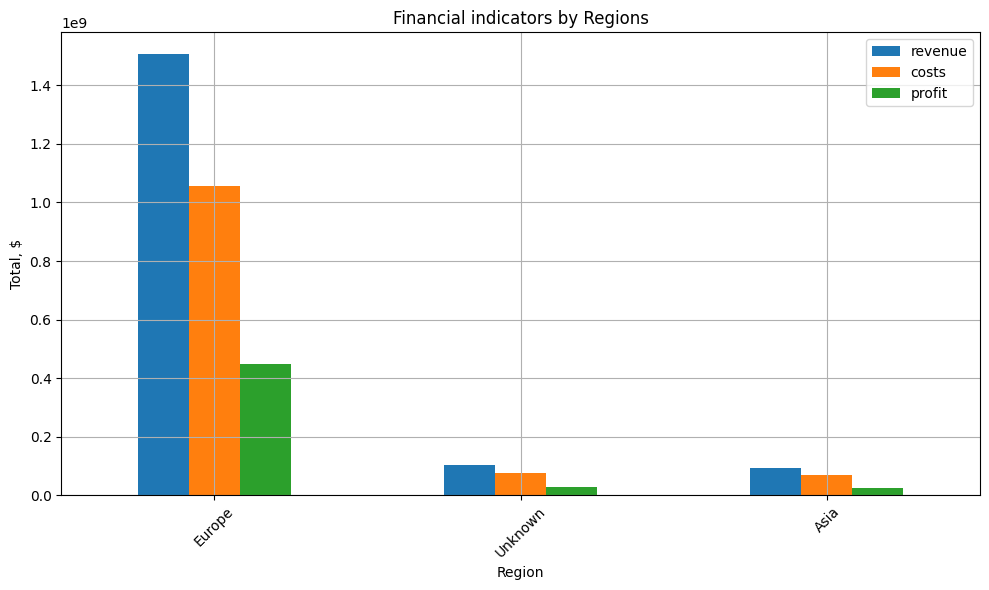

In [ ]:
# Створюємо візуалізацію фінансових показників по регіонах
category_summary = data.groupby("region")[["revenue", "costs", "profit"]].sum().sort_values(by="revenue", ascending=False)

category_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Financial indicators by Regions")
plt.ylabel("Total, $")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Приводимо дані до одного регістру
data["sales_channel"] = data["sales_channel"].str.capitalize()

In [ ]:
# Рахуємо доходи по каналах продажів
revenue_by_sales_channel = data.groupby("sales_channel")["revenue"].sum()

print(f"Доходи по каналах продажів: {revenue_by_sales_channel}")

Доходи по каналах продажів: sales_channel
Offline    8.717606e+08
Online     8.303688e+08
Name: revenue, dtype: float64


In [ ]:
# Рахуємо витрати по каналах продажів
costs_by_sales_channel = data.groupby("sales_channel")["costs"].sum()

print(f"Витрати по каналах продажів: {costs_by_sales_channel}")

Витрати по каналах продажів: sales_channel
Offline    6.182941e+08
Online     5.824008e+08
Name: costs, dtype: float64


In [ ]:
# Рахуємо прибуток по каналах продажів
profit_by_sales_channel = data.groupby("sales_channel")["profit"].sum()

print(f"Прибуток по каналах продажів: {profit_by_sales_channel}")

Прибуток по каналах продажів: sales_channel
Offline    2.534665e+08
Online     2.479679e+08
Name: profit, dtype: float64


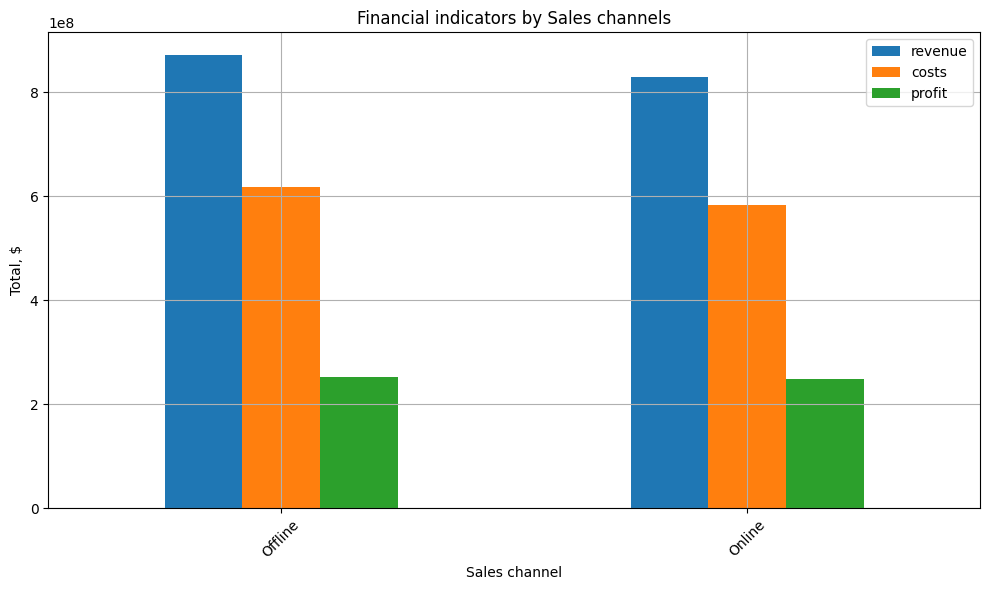

In [ ]:
# Створюємо візуалізацію фінансових показників по каналах продажів
category_summary = data.groupby("sales_channel")[["revenue", "costs", "profit"]].sum().sort_values(by="revenue", ascending=False)

category_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Financial indicators by Sales channels")
plt.ylabel("Total, $")
plt.xlabel("Sales channel")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.4. Проаналізуємо інтервал часу між замовленням та його відвантаженням та зробимо відповідні візуалізації в розрізі:

- категорій товарів;
- країн;
- регіонів.

In [ ]:
# Вираховуємо інтервал часу між замовленням та його відвантаженням
data["processing_time"] = (data["ship_date"] - data["order_date"]).dt.days

In [ ]:
# Рахуємо середній час обробки замовлення по категоріях
processing_time_by_category = data.groupby("item_type")["processing_time"].mean().sort_values(ascending=False)
print(processing_time_by_category)

item_type
Cereal             27.184466
Office Supplies    26.707317
Baby Food          26.339286
Cosmetics          25.912281
Meat               25.909091
Snacks             25.543689
Fruits             24.419643
Beverages          24.123967
Household          23.938144
Vegetables         23.491228
Clothes            23.104762
Personal Care      20.763158
Name: processing_time, dtype: float64


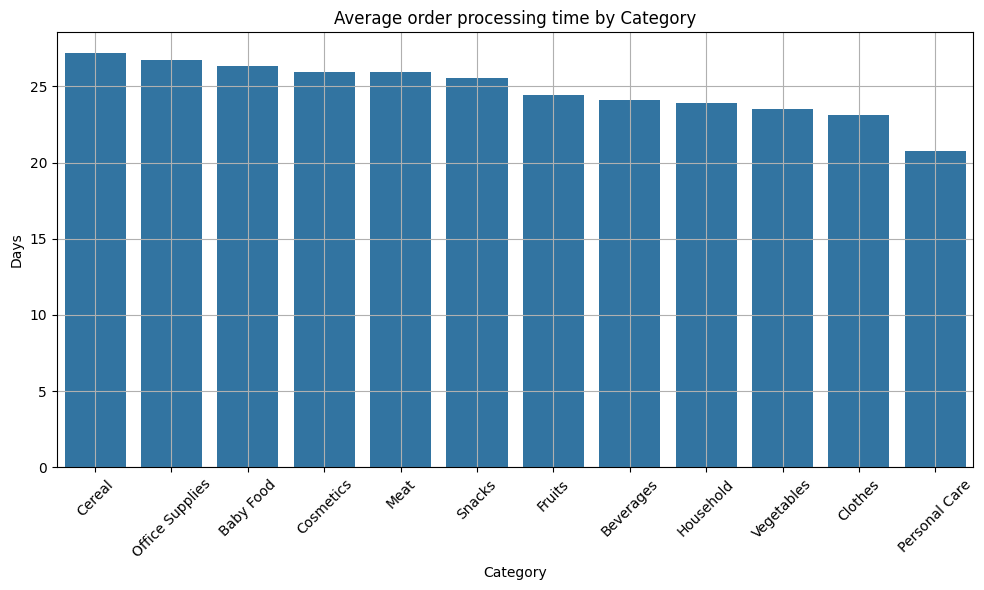

In [ ]:
# Створюємо візуалізацію середнього часу обробки замовлення по категоріях
plt.figure(figsize=(10, 6))
sns.barplot(x=processing_time_by_category.index, y=processing_time_by_category.values)
plt.title("Average order processing time by Category")
plt.ylabel("Days")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Рахуємо середній час обробки замовлення по країнах
processing_time_by_country = data.groupby("country")["processing_time"].mean().sort_values(ascending=False).head(15)
print(processing_time_by_country)

country
Hungary        32.640000
Georgia        29.695652
Austria        28.500000
Slovakia       28.466667
Luxembourg     27.750000
Lithuania      27.560000
Poland         27.464286
Russia         27.375000
Monaco         26.846154
Bulgaria       26.800000
Montenegro     26.678571
Netherlands    26.625000
Belgium        26.538462
Spain          26.440000
France         26.423077
Name: processing_time, dtype: float64


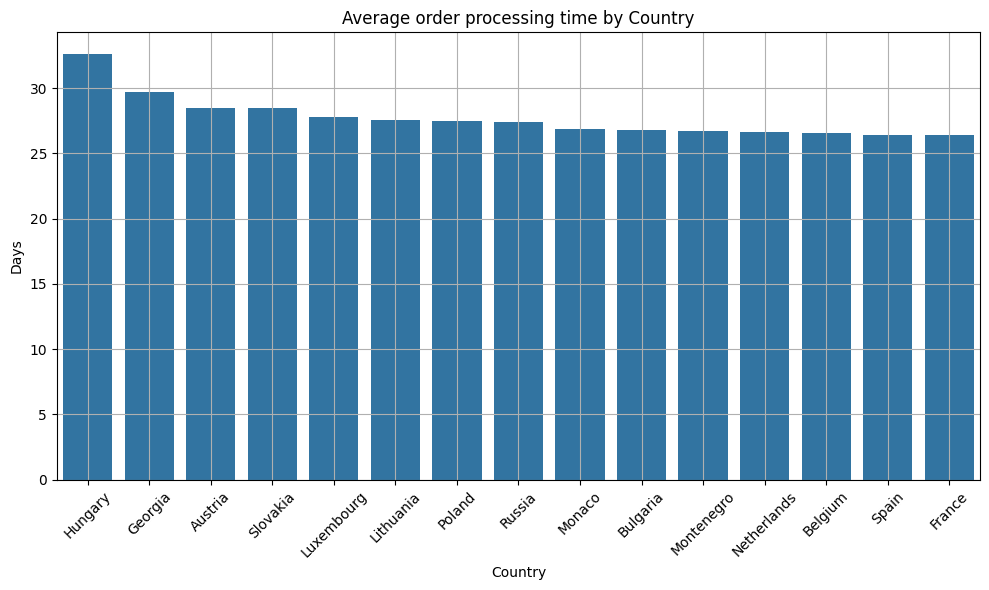

In [ ]:
# Створюємо візуалізацію середнього часу обробки замовлення по країнах
plt.figure(figsize=(10, 6))
sns.barplot(x=processing_time_by_country.index, y=processing_time_by_country.values)
plt.title("Average order processing time by Country")
plt.ylabel("Days")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Рахуємо середній час обробки замовлення по регіонах
processing_time_by_region = data.groupby("region")["processing_time"].mean().sort_values(ascending=False)
print(processing_time_by_region)

region
Asia       26.085366
Europe     24.790378
Unknown    23.439024
Name: processing_time, dtype: float64


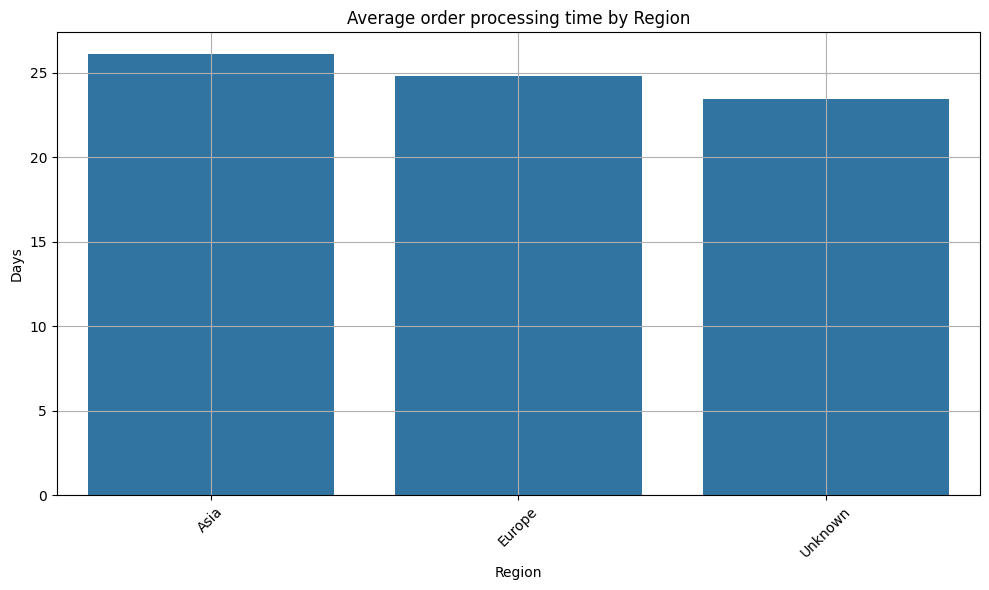

In [ ]:
# Створюємо візуалізацію середнього часу обробки замовлення по регіонах
plt.figure(figsize=(10, 6))
sns.barplot(x=processing_time_by_region.index, y=processing_time_by_region.values)
plt.title("Average order processing time by Region")
plt.ylabel("Days")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.5. Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару. Зроби потрібні для цього агрегування та візуалізації.

In [ ]:
# Розрахунок залежності прибутку від часу доставки
profit_by_processing_time = data.groupby("processing_time")["profit"].mean()

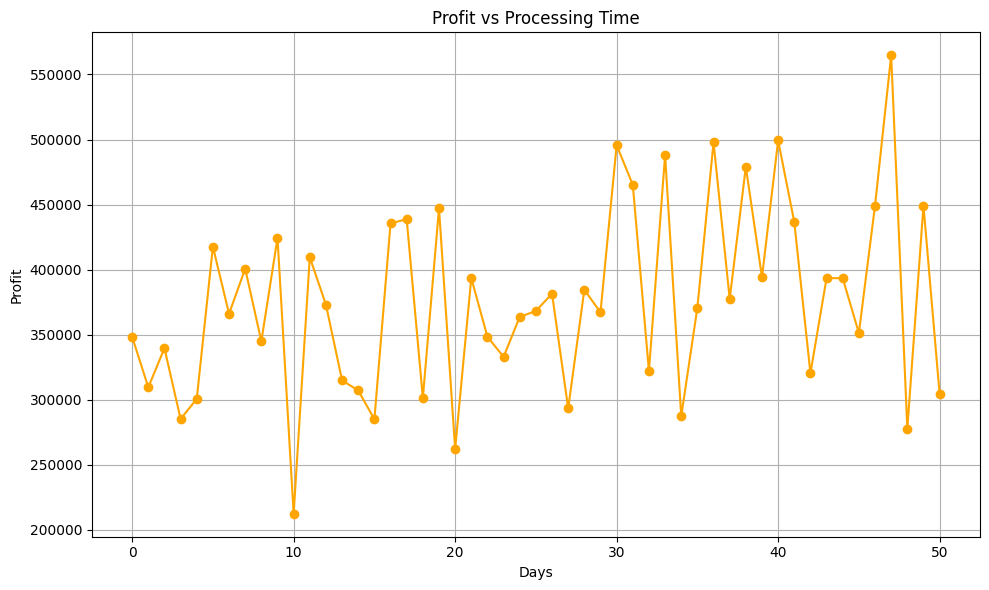

In [ ]:
# Візуалізація залежності прибутку від часу доставки
plt.figure(figsize=(10, 6))
profit_by_processing_time.plot(kind="line", marker="o", color="orange")
plt.title("Profit vs Processing Time")
plt.xlabel("Days")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.6. Проаналізуємо за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визначимо основні тенденції.

In [ ]:
# Додаємо колонку з роками
data["year"] = data["order_date"].dt.year

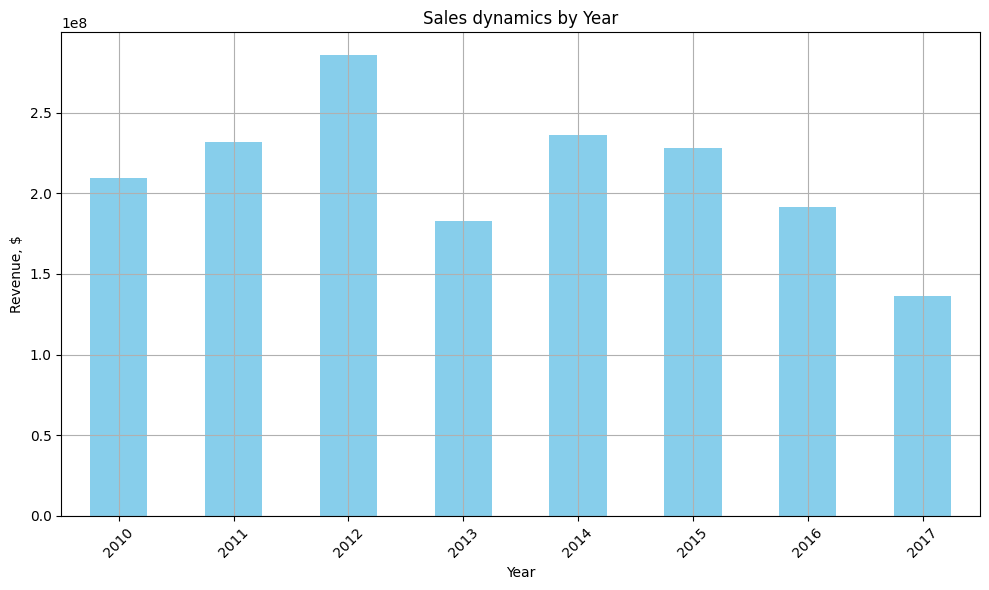

In [ ]:
# Динаміка продажів по роках
sales_by_year = data.groupby(["year"])["revenue"].sum()

plt.figure(figsize=(10, 6))
sales_by_year.plot(kind="bar", color="skyblue")
plt.title("Sales dynamics by Year")
plt.xlabel("Year")
plt.ylabel("Revenue, $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- На графіку бачимо, що перші роки з 2010 по 2012 була тенденція до зростання продажів
- З 2013 по 2016 почалися коливання: то зріст, то падіння
- В 2017 році різке падіння продажів у порівнянні з минулими роками

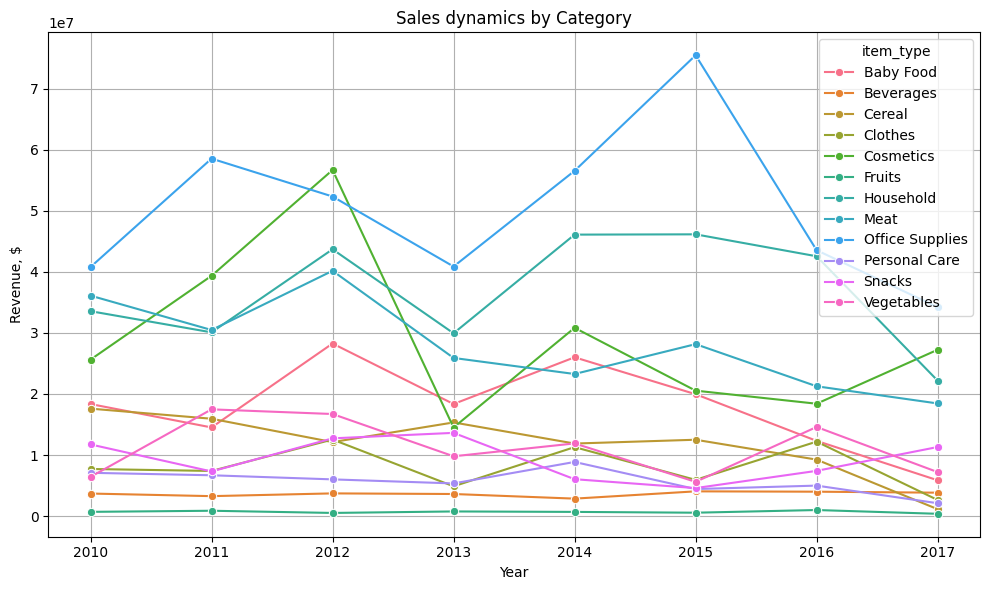

In [ ]:
# Динаміка продажів по категоріях товарів
category_year = data.groupby(["year", "item_type"])["revenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=category_year, x="year", y="revenue", hue="item_type", marker="o")
plt.title("Sales dynamics by Category")
plt.xlabel("Year")
plt.ylabel("Revenue, $")
plt.grid(True)
plt.tight_layout()
plt.show()

- На цьому графіку бачимо, що динаміка продажів по категоріях товару в цілому хаотична
- Є великі всплески в таких категоріях: в 2012 найвищий показник у категорії Cosmetics, в 2014 найвищий у Personal Care, найнижчий показник у категорії Snacks був в 2014 та 2015 роках
- В 2017 падіння у всіх категоріях, особливо у Clothes. Зріст був тільки у категорії Meat

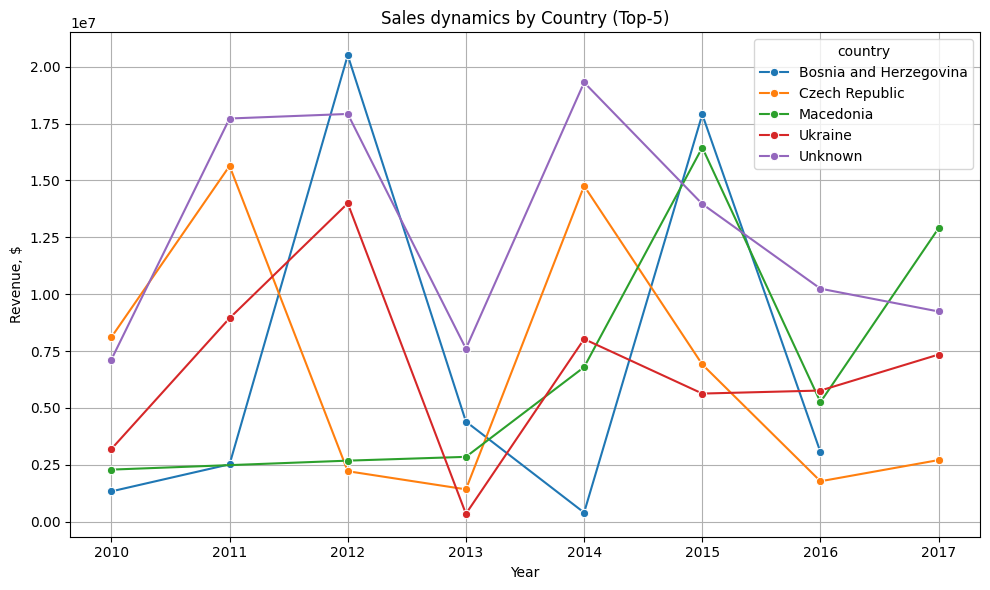

In [ ]:
# Динаміка продажів по країнах (ТОП-5)
top_countries = data.groupby("country")["revenue"].sum().nlargest(5).index
country_year = data[data["country"].isin(top_countries)].groupby(["year", "country"])["revenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=country_year, x="year", y="revenue", hue="country", marker="o")
plt.title("Sales dynamics by Country (Top-5)")
plt.xlabel("Year")
plt.ylabel("Revenue, $")
plt.grid(True)
plt.tight_layout()
plt.show()

- На графіку бачимо, що найвижчий показник продажів має категорія, де країна невідома (Unknown)
- Даниміка продажів по країнам теж хаотична із року в рік
- В 2012 був піковий показник показали Bosnia and Herzegovina та San Marino
- Далі були падіння продажів
- Повторний пік був вже в 2016 році у Andorra та San Marino

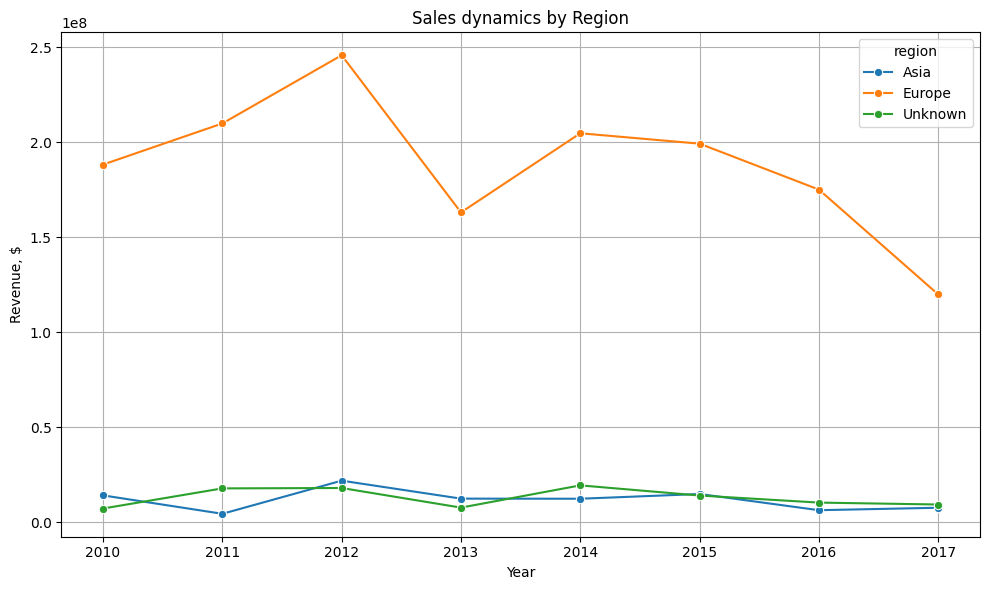

In [ ]:
# Динаміка продажів по регіонах
region_year = data.groupby(["year", "region"])["revenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_year, x="year", y="revenue", hue="region", marker="o")
plt.title("Sales dynamics by Region")
plt.xlabel("Year")
plt.ylabel("Revenue, $")
plt.grid(True)
plt.tight_layout()
plt.show()

- Ця діаграма демонструє, що основна доля продажів в регіоні Europe
- Asia та Unknown мають однаково динаміку

### 3.7. Проведемо аналіз продажів товарів за днями тижня.

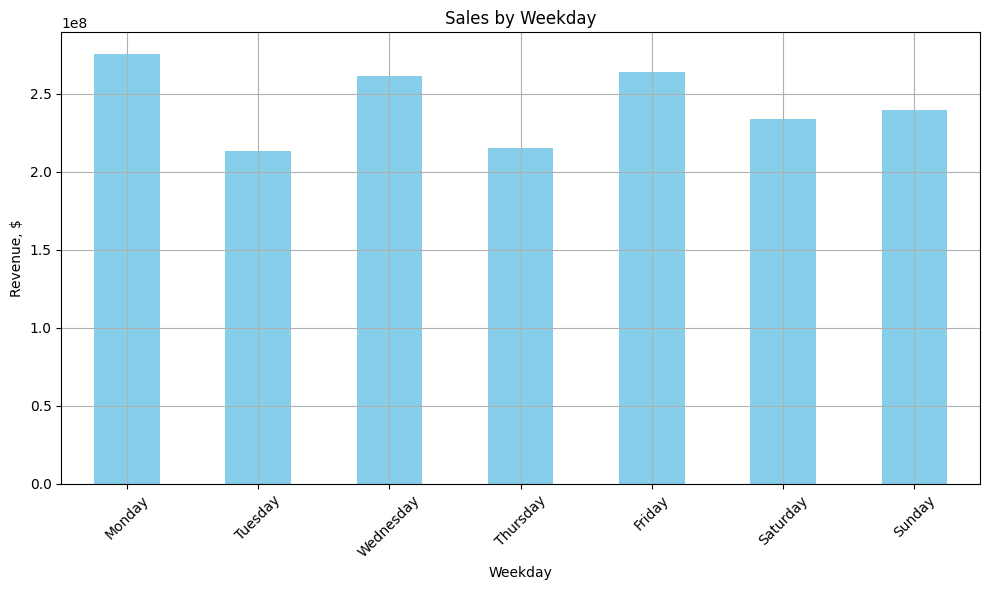

In [ ]:
# Аналіз продажів за днями тижня
sales_by_weekday = data.groupby(data["order_date"].dt.day_name())["revenue"].sum()
sales_by_weekday = sales_by_weekday.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind="bar", color="skyblue")
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue, $")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Найбільший показник продажів у Неділю
- Найнижчий показник продажів у Четвер
- Активний період продажів з Суботи по Понеділок

# 4. Reporting

**Ключові показники:**
- Загальна кількість замовлень: 1328
- Загальні продажі компанії: 1 702 129 408.21 USD
- Загальні витрати компанії: 1 200 694 949.21 USD
- Чистий прибуток компанії: 501 434 459.0 USD
- Загальна кількість охоплених країн: 46





**ТОП-3 категорії товарів по продажам та по чистому прибутку:**
- Office Supplies
- Beverages
- Cosmetics

**ТОП-5 країн по продажам та по чистому прибутку:**
- Unknown
- Andorra
- San Marino
- Romania
- Ukraine

**Канали продажів:**
- Online та Offline мають майже однакові показники по доходам та прибутку
- Тому обидва канали продажів важливі для компанії та потребують подальшого розвитку

**Інтервал часу між замовленням та його відвантаженням:**
- Прибуток не має прямої залежності від тривалості обробки замовлення
- Прибуток коливається хаотично на всьому діапазоні днів (від 0 до 50)
- Найбільший середній показник інтервалу доставки показала Hungary - 32.6 дні
- Найменший середній показник інтервалу доставки показала Crotia - 18.3 днів